In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt
!ls


--2022-02-17 08:16:52--  https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.171.184
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.171.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1001 [text/plain]
Saving to: ‘trainingdata.txt.2’

trainingdata.txt.2  100%[===================>]    1001  --.-KB/s    in 0s      

2022-02-17 08:16:52 (40.2 MB/s) - ‘trainingdata.txt.2’ saved [1001/1001]

sample_data  trainingdata.txt  trainingdata.txt.1  trainingdata.txt.2


In [ ]:
train = pd.read_csv('trainingdata.txt', names= ["Charged_for", "Served_for"])
train.head
train.describe()

,Charged_for,Served_for
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


In [ ]:
train.columns

Index(['Charged_for', 'Served_for'], dtype='object')

In [ ]:
import sklearn
import matplotlib.pyplot as plt

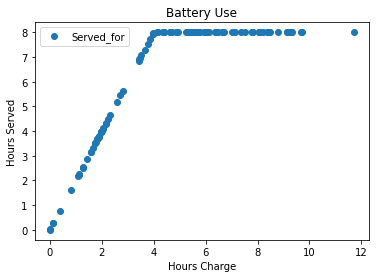

In [ ]:
train.plot(x='Charged_for', y='Served_for', style='o')
plt.title('Battery Use')
plt.xlabel('Hours Charge')
plt.ylabel('Hours Served')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.iloc[:, :-1].values
y = train.iloc[:, 1].values

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('regressor.intercept_ -> ', regressor.intercept_)
print('regressor.coef_ ->', regressor.coef_)

regressor.intercept_ ->  2.833021060740887
regressor.coef_ -> [0.71507608]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,8.00,7.402357
1,3.16,3.962841
2,5.44,4.778028
3,8.00,8.217544
4,8.00,9.118540
5,7.94,5.671873
6,1.60,3.405082
7,8.00,5.771984
8,8.00,5.972205
9,8.00,5.965054


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3345985106779832
Mean Squared Error: 2.319124927555542
Root Mean Squared Error: 1.522867337477412
